# Calculating values on total energy increase with each percentage of EV adoption reported in the text.

Developed by Siobhan Powell, 2021. 

In [1]:
import os
os.chdir('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import pickle
import datetime

In [3]:
noev_scenario = pd.read_csv('Results/NoEVs_year2030_solar2.5x_wind2.5x_dpdf_20211119.csv')

In [5]:
vals_shift = noev_scenario['total_incl_noncombustion'].sum()

In [4]:
scens1 = ['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

vals = np.zeros((10, 6, 5)) # energy
tables_dfs = {penlevel: pd.DataFrame(np.zeros((6, 5)), 
                                     index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                                     columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual']) for penlevel in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
tables_dfs_timeofpeak = {penlevel: pd.DataFrame(np.zeros((6, 5)), 
                                                index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                                                columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual']) for penlevel in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

for i, scen1 in enumerate(scens1):
    for j, scen2 in enumerate(scens2):
        for k, penlevel in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
            try:
                demand_df = pd.read_csv('Results/ImpactCurves/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_futuredemand_df_20211119.csv', index_col=0)
            except:
                print('Error for ', penlevel, scen1, scen2)
            vals[k, i, j] = demand_df['total_incl_noncombustion'].sum()
        
        k = k+1
        penlevel = 1.0
        try: 
            dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_dpdf_20211119.csv')
        except:
            try:
                dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20211119.csv')
            except: 
                print('Error for ', penlevel, scen1, scen2)
                    
        vals[k, i, j] = dpdf['total_incl_noncombustion'].sum()
        
scen2 = 'BusinessAsUsual'
scen1 =  '_TimersMixed_WPcontrol_minpeak'
i = i+1
j = j+1
for k, penlevel in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
    try:
        demand_df = pd.read_csv('Results/ImpactCurves/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_futuredemand_df_20211119.csv', index_col=0)
    except:
        print('Error for ', penlevel, scen1, scen2)
    vals[k, i, j] = demand_df['total_incl_noncombustion'].sum()

k = k+1
penlevel = 1.0
try: 
    dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_dpdf_20211119.csv')
except:
    try:
        dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20211119.csv')
    except: 
        print('Error for ', penlevel, scen1, scen2)
        print('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20211119.csv')

vals[k, i, j] = dpdf['total_incl_noncombustion'].sum()



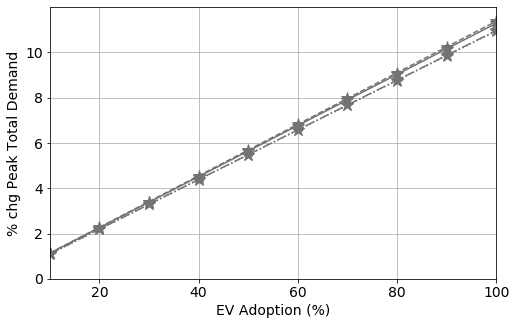

In [8]:
plt.figure(figsize=(8, 5))
colors = ['#d7301f', '#fc8d59', '#737373', '#9ebcda', '#88419d']
lines = ['--', '-', ':', '-.']

markers=['P', 'X', '*', '^', 'v']
ms = [8,8,12,8,8]

idx_control = 2
for idx_access in range(4):
    plt.plot(np.arange(10, 105, 10), 100*((vals[:, idx_control, idx_access]-vals_shift)/vals_shift), lines[idx_access], color=colors[idx_control], marker=markers[idx_control],  markersize=ms[idx_control])
plt.xticks(np.arange(20, 125, 20), fontsize=14)
plt.xlabel('EV Adoption (%)', fontsize=14)
plt.yticks(np.arange(0, 12, 2), fontsize=14)
plt.ylabel('% chg Peak Total Demand', fontsize=14)
plt.xlim([10, 100])
plt.ylim([0, 12])
# axes[0].set_axisbelow(True)        
plt.grid()
plt.show()

In [18]:
ct = 0
val = 0
for control_idx in range(5):
    for scen_idx in range(4):
        val += vals[9, control_idx, scen_idx]
        ct += 1
val += vals[9, 5, 4]
ct += 1
mean_val = val / ct
print('Mean increase in energy over no evs: ', np.round((mean_val - vals_shift) / vals_shift, 5))

Mean increase in energy over no evs:  0.11203


In [23]:
ct = 0
val = 0
for control_idx in range(5):
    for scen_idx in range(4):
        val += vals[1, control_idx, scen_idx]
        ct += 1
val += vals[1, 5, 4]
ct += 1
mean_val = val / ct
print('Mean increase in energy over no evs, at 20% adoption: ', np.round((mean_val - vals_shift) / vals_shift, 5))

Mean increase in energy over no evs, at 20% adoption:  0.02241


In [22]:
ct = 0
val = 0
for control_idx in range(5):
    for scen_idx in range(4):
        val += ((vals[9, control_idx, scen_idx] - vals_shift) - (vals[0, control_idx, scen_idx]  - vals_shift))
        ct += 1
val += ((vals[9, 5, 4] - vals_shift) - (vals[0, 5, 4]  - vals_shift))
ct += 1
mean_val = val / ct
print('Mean change per degree: ', np.round(mean_val / (vals_shift*90), 5))

Mean change per degree:  0.00112


In [24]:
noev_scenario_2019 = pd.read_csv('Results/NoEVs_year2019_dpdf_20211119.csv')

In [25]:
ct = 0
val = 0
for control_idx in range(5):
    for scen_idx in range(4):
        val += vals[9, control_idx, scen_idx]
        ct += 1
val += vals[9, 5, 4]
ct += 1
mean_val = val / ct

vals_shift_2019 = noev_scenario_2019.total_incl_noncombustion.sum()

print('Mean increase in energy over no evs: ', np.round((mean_val - vals_shift_2019) / vals_shift_2019, 5))

Mean increase in energy over no evs:  0.22323
